# AdaBoost Classifier

### Importing of libreries

In [ ]:
from google.colab import drive
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.multiclass import OneVsRestClassifier
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
import pickle

### Connecting to Google Drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


### Loading the datasets (Numpy arrays)
Datasets are saved in numpy arrays for load quickly 

In [ ]:
X_train = np.load('/content/drive/MyDrive/ml_dl/immagini-5/training_set/X_train.npy')
y_train = np.load('/content/drive/MyDrive/ml_dl/immagini-5/training_set/y_train.npy')

X_validation = np.load('/content/drive/MyDrive/ml_dl/immagini-5/validation_set/X_val.npy')
y_validation = np.load('/content/drive/MyDrive/ml_dl/immagini-5/validation_set/y_val.npy')

X_test = np.load('/content/drive/MyDrive/ml_dl/immagini-5/test_set/X_test.npy')
y_test = np.load('/content/drive/MyDrive/ml_dl/immagini-5/test_set/y_test.npy')

X = np.load('/content/drive/MyDrive/ml_dl/immagini-5/dataset/X.npy')
y = np.load('/content/drive/MyDrive/ml_dl/immagini-5/dataset/y.npy')

### Random Forest Classifier for AdaBoost base_estimator 
Training the model

In [ ]:
random_forest_clf = RandomForestClassifier()
random_forest_clf.fit(X_train, y_train)

RandomForestClassifier()

Predictions using validation_set

In [ ]:
y_pred = random_forest_clf.predict(X_validation)
print("Accuracy:", metrics.accuracy_score(y_validation, y_pred))

Accuracy: 0.8674546222034614


Plotting the confusion matrix

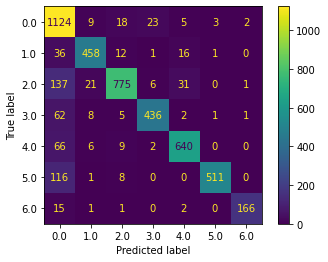

In [ ]:
cm = confusion_matrix(y_validation, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = random_forest_clf.classes_)
disp.plot()
plt.show()

### AdaBoost Classifier
Training the model

In [ ]:
adaboost_classifier = AdaBoostClassifier(base_estimator = random_forest_clf)
adaboost_classifier.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=RandomForestClassifier())

Predictions using validation_set

In [ ]:
y_pred = adaboost_classifier.predict(X_validation)
print("Accuracy:", metrics.accuracy_score(y_validation, y_pred))

Accuracy: 0.8710426340227945


Plotting the confusion matrix

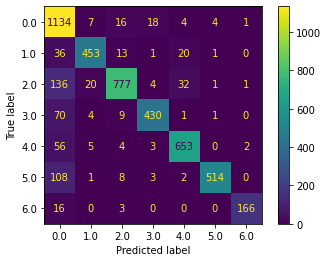

In [ ]:
cm = confusion_matrix(y_validation, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = adaboost_classifier.classes_)
disp.plot()
plt.show()

Learing rate tuning for increase performance: [0.5, 1.0]

In [ ]:
rate = [0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
acc = []

for i in rate:
  adaboost_classifier = AdaBoostClassifier(base_estimator = random_forest_clf, learning_rate = i)
  adaboost_classifier.fit(X_train, y_train)
  y_pred = adaboost_classifier.predict(X_validation)
  a = metrics.accuracy_score(y_validation, y_pred)
  acc.append(a)

Printing the AdaBoost learning rate curve

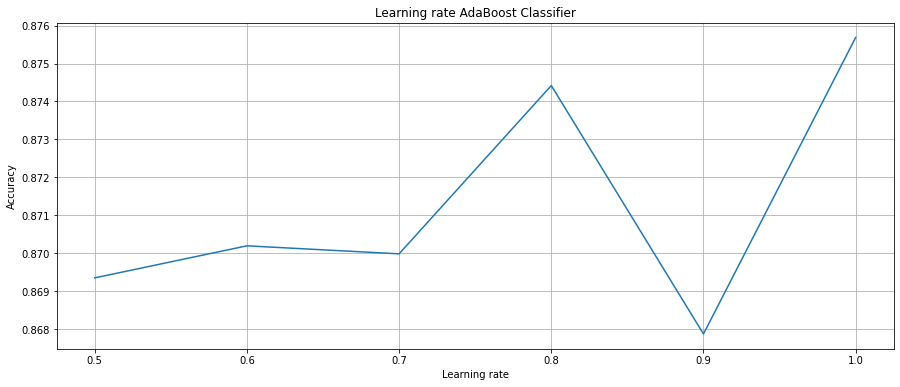

In [ ]:
plt.figure(figsize=(15, 6))
plt.plot(rate, acc)
plt.title("Learning rate AdaBoost Classifier")
plt.xlabel("Learning rate")
plt.ylabel("Accuracy")
plt.grid(True)
plt.xticks(rate)
plt.show()

### One vs Rest Classifier for better predictions

In [ ]:
ovr = OneVsRestClassifier(AdaBoostClassifier(base_estimator = random_forest_clf, learning_rate=1), n_jobs=-1)
ovr.fit(X_train, y_train)

OneVsRestClassifier(estimator=AdaBoostClassifier(base_estimator=RandomForestClassifier(),
                                                 learning_rate=1),
                    n_jobs=-1)

In [ ]:
y_pred = ovr.predict(X_validation)
print("Accuracy:", metrics.accuracy_score(y_validation, y_pred))

Accuracy: 0.8910932883073026


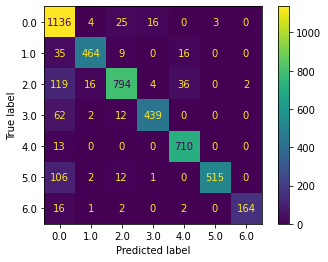

In [ ]:
cm = confusion_matrix(y_validation, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ovr.classes_)
disp.plot()
plt.show()

### Testing on test_set

In [ ]:
y_pred = ovr.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8924050632911392


### 10-fold Cross Validation

In [ ]:
scores = cross_val_score(ovr, X = X, y = y, cv=10, n_jobs=-1)
accuracy_CV10 = np.mean(scores)
print('Cross Validation accuracy: ' + str(accuracy_CV10))

/usr/local/lib/python3.8/dist-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Cross Validation accuracy: 0.854859015300168



### Saving the model

In [ ]:
filename = "/content/drive/MyDrive/ml_dl/immagini-5/models/image_ovr_adaboost.pkl"
pickle.dump(ovr, open(filename, "wb"))